In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from visual_genome.visual_genome import VisualGenome
from PIL import Image as PIL_Image
import os
import json

### Creating train/val split

In [2]:
anno_dir = '../visual_genome/annotations/'
image_annotation_file = os.path.join(anno_dir, 'image_data.json')
train_image_annotation_file = os.path.join(anno_dir, 'train_image_data.json')
val_image_annotation_file = os.path.join(anno_dir, 'val_image_data.json')

val_len = 5000

In [3]:
image_data = json.load(open(image_annotation_file, 'r'))
len(image_data)

108077

In [4]:
val_image_data = image_data[:val_len]
train_image_data = image_data[val_len:]
print('Train size {}'.format(len(train_image_data)))
print('Val size {}'.format(len(val_image_data)))

Train size 103077
Val size 5000


In [5]:
with open(train_image_annotation_file, 'w') as f:
    json.dump(train_image_data, f)
with open(val_image_annotation_file, 'w') as f:
    json.dump(val_image_data, f)

#### Making visual genome object

In [5]:
object_annotation_file = os.path.join(anno_dir, 'objects.json')

In [5]:
object_data = json.load(open(object_annotation_file, 'r'))
len(object_data)

108077

In [6]:
vg = VisualGenome(val_image_annotation_file, object_annotation_file)

loading annotations into memory...
Done (t=18.14s)
creating index...
index created!


In [7]:
len(vg.imgs.keys())

4794

#### Getting the image data
Next, we will get some data about the image. We specifically want to know the image's url.

In [8]:
img_ids = list(vg.imgs.keys())
image = vg.loadImgs(img_ids[0])[0]
print ("The filename of the image is: %s" % image.filename)

The filename of the image is: 1.jpg


#### Getting the region descriptions
Now, let's get all the region descriptions for this image.

In [9]:
objects = vg.loadAnns(image_ids=image.id)[0]
print ("The first object is located in a bounding box specified by x:%d, y:%d, width:%d, height:%d" % (objects[0].x, objects[0].y, objects[0].width, objects[0].height))

The first object is located in a bounding box specified by x:0, y:0, width:799, height:557


In [10]:
len(objects)

31

#### Visualizing some regions
Now, we will visualize some of the regions. The x,y coordinates of a region refer to the top left corner of the region. Since there are many regions, we will only visualize the first 4.

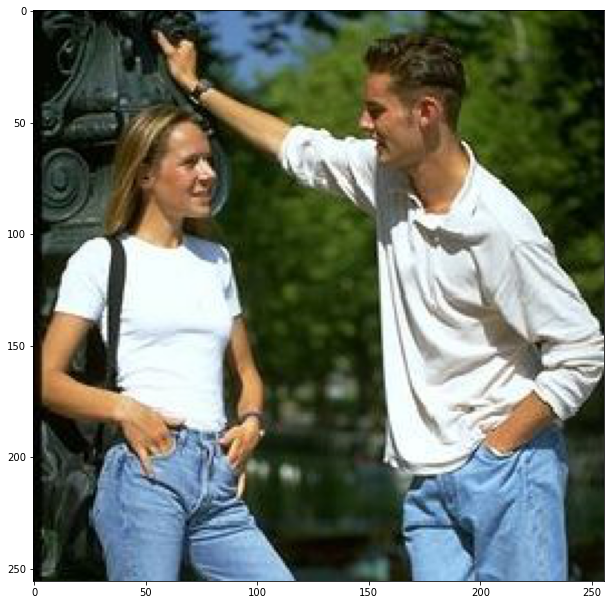

In [39]:
root_dir = '../visual_genome/images'
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
def visualize_objects(image, objects):
    img = PIL_Image.open(os.path.join(root_dir, image.filename))
    plt.imshow(img)
    ax = plt.gca()
    # for object in objects:
    #     ax.add_patch(Rectangle((object.x, object.y),
    #                            object.width,
    #                            object.height,
    #                            fill=False,
    #                            edgecolor='red',
    #                            linewidth=3))
    #     ax.text(object.x, object.y, object.names, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})
    # fig = plt.gcf()
    # plt.tick_params(labelbottom='off', labelleft='off')
    # plt.show()

img_id = 114 # img_ids[27]
image = vg.loadImgs(img_id)[0]
objects = vg.loadAnns(image_ids=image.id)[0]
visualize_objects(image, objects[:2])

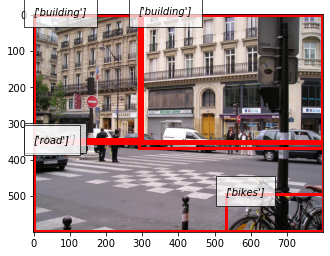

113


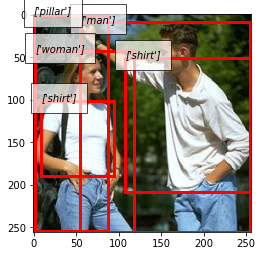

114


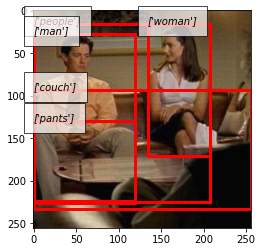

115


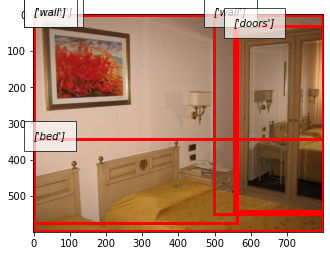

117


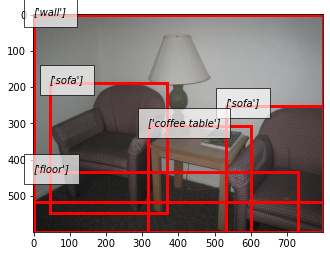

118


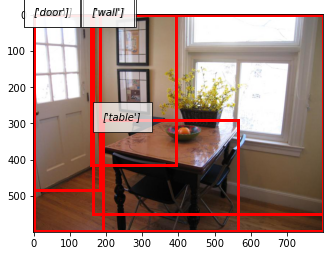

119


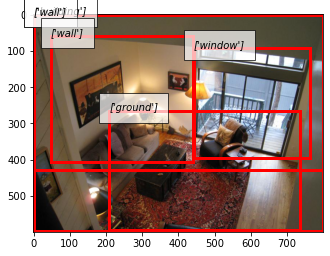

120


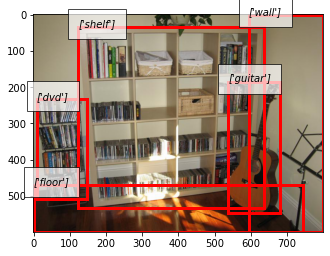

121


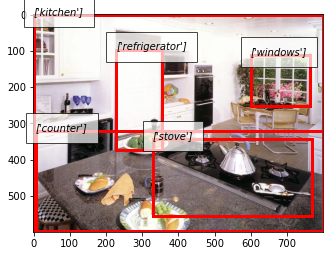

122


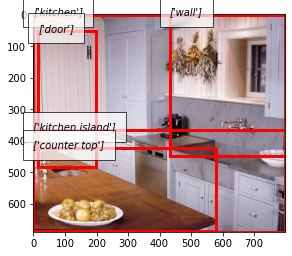

124


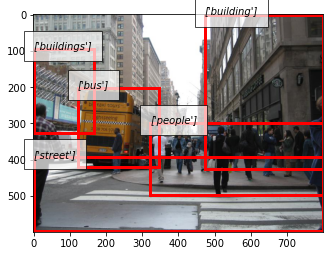

126


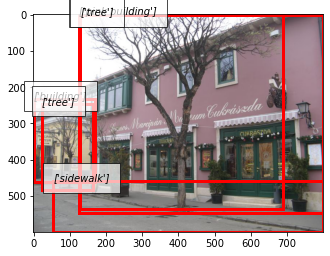

130


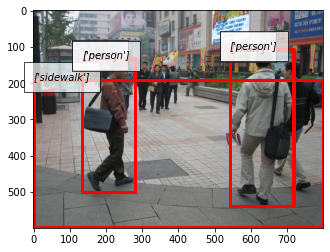

131


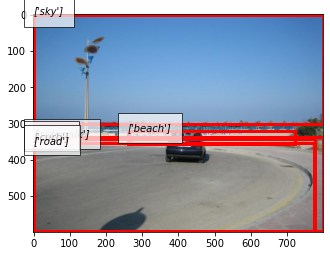

132


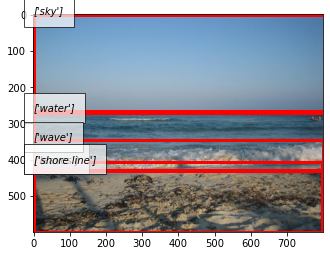

133


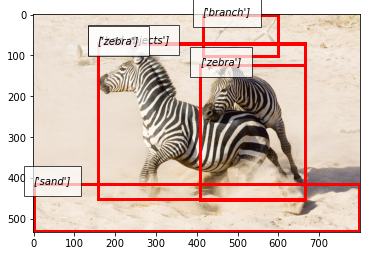

134


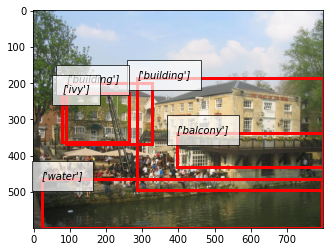

135


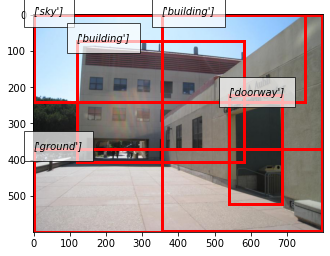

136


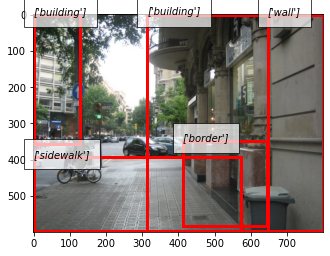

137


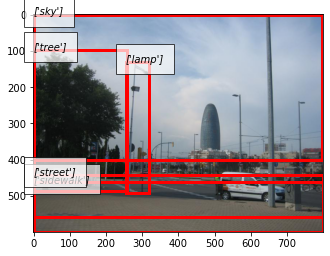

138


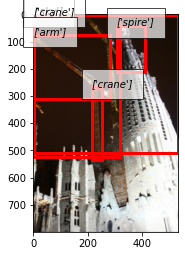

139


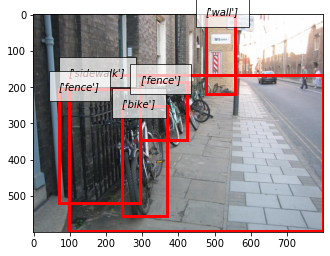

140


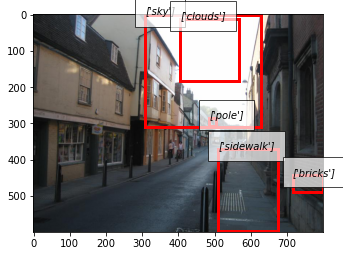

141


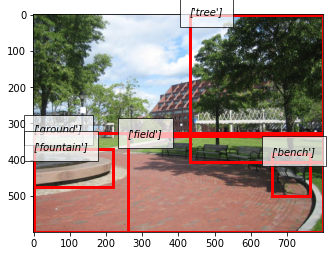

142


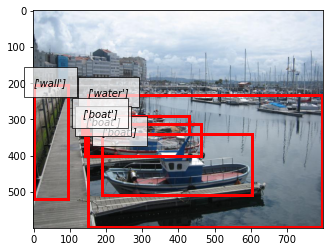

144


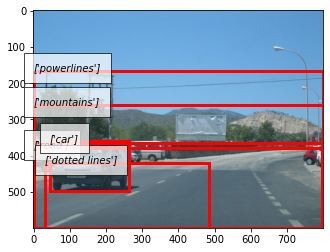

145


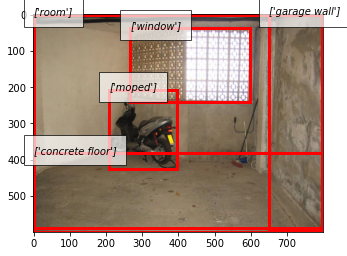

146


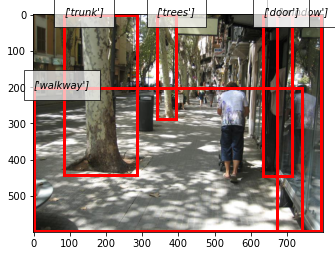

148


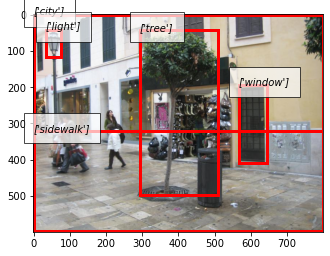

150


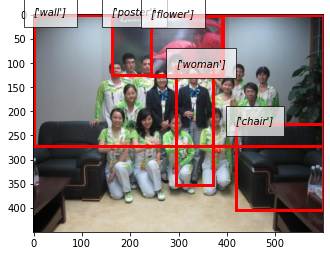

152


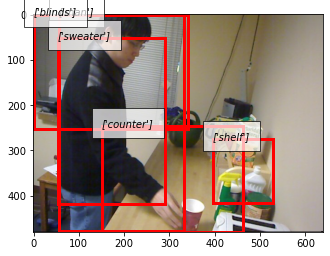

153


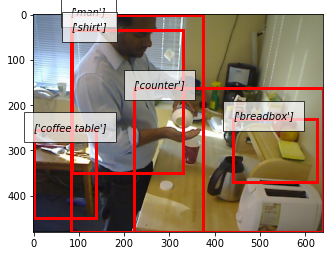

154


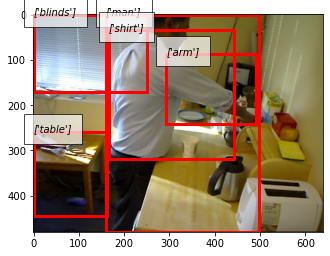

155


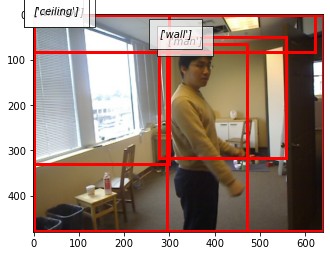

156


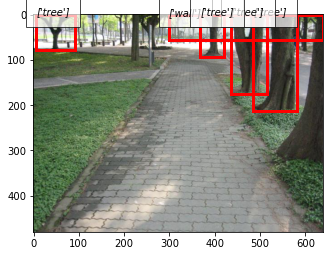

157


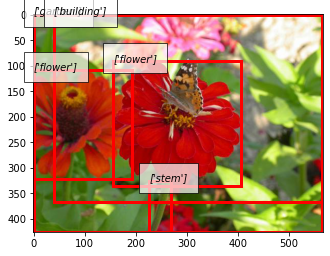

158


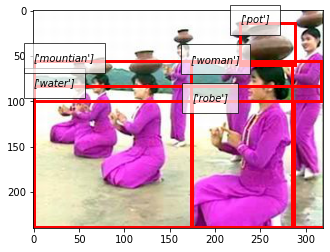

160


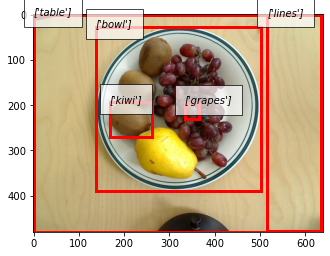

162


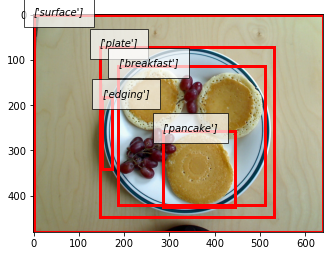

163


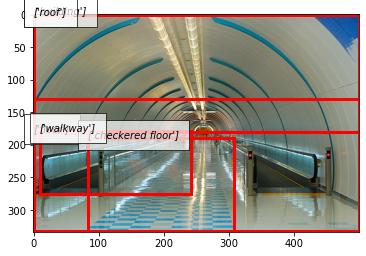

164


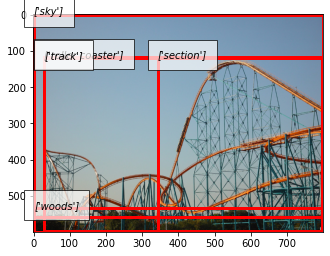

165


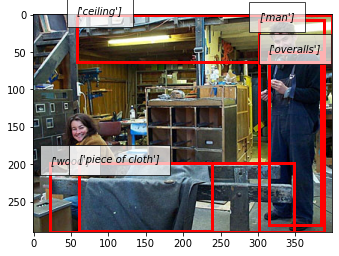

167


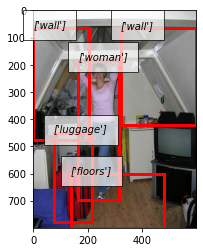

168


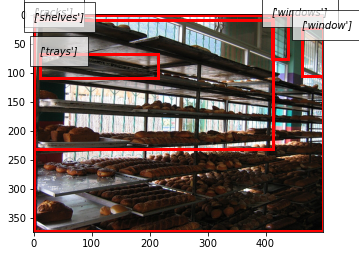

169


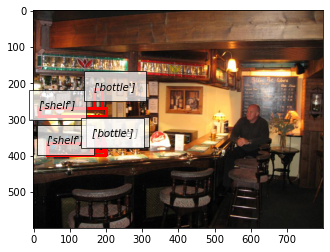

170


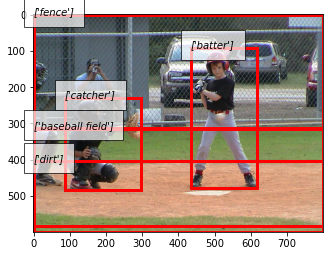

171


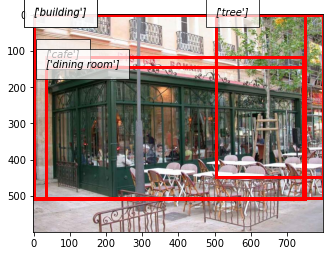

172


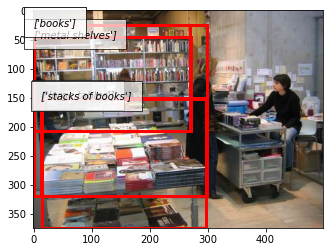

173


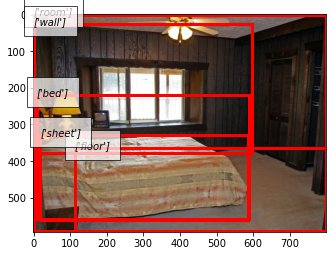

174


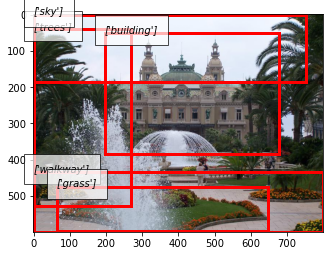

176


In [36]:
for id in range(100, 150):
    img_id = img_ids[id]
    image = vg.loadImgs(img_id)[0]
    objects = vg.loadAnns(image_ids=image.id)[0]
    visualize_objects(image, objects[:5])
    print(img_id)

In [21]:
def verify_data(v):
    img_ids = list(v.imgs.keys())
    for id in img_ids:
        assert len(v.loadAnns(id)[0]) > 0

In [22]:
verify_data(vg)

In [23]:
vg_train = VisualGenome(train_image_annotation_file, object_annotation_file)

loading annotations into memory...
Done (t=25.88s)
creating index...
index created!


In [24]:
verify_data(vg_train)